# Pushing the phase-plane symmetries of the Lotka-Volterra model forward
*Written by:* Johannes Borgqvist,<br>
*Date:* 2022-08-18.<br>
In this script, we consider the phase plane ODE

\begin{equation}
\dfrac{\mathrm{d}v}{\mathrm{d}u}=\dfrac{\alpha v(u-1)}{u(1-v)}.
  \label{eq:LV_phase_plane}
\end{equation}
which has the following two non-trivial symmetries:
\begin{align}
  X_u&=\dfrac{1}{\alpha}\left(\dfrac{u}{u-1}\right)\partial_u,\label{eq:LV_u}\\
  X_v&=\dfrac{v}{1-v}\partial_v.\label{eq:LV_v}
\end{align}
Now, the full Lotka-Volterra model is given by 
\begin{equation}
  \begin{split}
    \dfrac{\mathrm{d}u}{\mathrm{d}\tau}&=u(1-v),\\
    \dfrac{\mathrm{d}v}{\mathrm{d}\tau}&=\alpha v(u-1),\\    
    \end{split}
  \label{eq:LV}
\end{equation}
and what we show in the paper is that the two non-trivial symmetries that we listed previously can be extended to two full symmetries acting on time as well as the states, i.e. mapping $(\tau,u(\tau),v(\tau))$ to another solution curve. These two unknown symmetries are generated by 
\begin{align}
  X_{\tau,u}&=\xi_{u}(\tau,u,v)\partial_\tau+\dfrac{1}{\alpha}\left(\dfrac{u}{u-1}\right)\partial_u,\label{eq:LV_u_full}\\
  X_{\tau,v}&=\xi_{v}(\tau,u,v)\partial_\tau+\dfrac{v}{1-v}\partial_v.\label{eq:LV_v_full}
\end{align}
and the two time infinitesimals $\xi_u$ and $\xi_v$ satisfy the following two PDEs
\begin{align}
  X_{\tau,u}:\quad u(1-v)\dfrac{\partial\xi_u}{\partial u}+\alpha v(u-1)\dfrac{\partial\xi_u}{\partial u}&=-\dfrac{u}{(u-1)^2},\label{eq:xi_u}\\
  X_{\tau,v}:\quad u(1-v)\dfrac{\partial\xi_v}{\partial u}+\alpha v(u-1)\dfrac{\partial\xi_v}{\partial u}&=+\dfrac{\alpha v}{(1-v)^2}\quad.\label{eq:xi_v}
\end{align}
In this notebook, we will find these two symmetries by solving the two PDEs above and then we will plot their action on solution curves to the full Lotka-Volterra model. 

The key for plotting their action is that we can express the infinitesimals $\xi_u$ and $\xi_v$ in terms of the Lambert W functions. In both cases, the time tangent will depend on the internal energy $H$ of a solution trajectory in the $(u,v)$-phase plane given by 
\begin{equation}
  H=\alpha u+v-\ln\left(u^\alpha v\right),\quad H=\alpha u_0+v_0-\ln\left(u_0^\alpha v_0\right)
  \label{eq:phase_trajectory_LV}
\end{equation}
where the initial conditions are denoted by $(u_0,v_0)$. Given this internal energy, the infinitesimal $\xi_u$ is given by 
\begin{equation}
  \begin{split}
    \xi_u(u)&=-\int_{u_{\min}}^{u}\dfrac{1}{(1+W_j(I(s)))(s-1)^2}\mathrm{d}s,\\
    I(s)&=-\left(\dfrac{\exp(s)}{s}\right)^{\alpha}\dfrac{1}{\exp(H)},
    \end{split}
  \label{eq:xi_u_final}
\end{equation}
where $W_j$ corresponds to the Lambert W function and $j=0,-1$ corresponds to the real branches of this function. Similarly, the infinitesimal $\xi_v$ is given by
\begin{equation}
  \begin{split}
    \xi_v(v)&=-\int_{v_{min}}^{v}\dfrac{1}{(W_j\left(I(s)\right)+1)(1-s)^2}\mathrm{d}s,\\
  I(s)&=-\dfrac{1}{\alpha}\left(\dfrac{\exp\left(s-H\right)}{\alpha s}\right)^{1/\alpha}.
\end{split}
  \label{eq:xi_v_final}
\end{equation}
So, we will try to solve these integrals numerically in order to plot the action of the respective symmetries. 

# Plotting the solutions of the Lotka-Volterra model and its symmetries
Ok, now we will move on and plot the solutions of the Lotka-Volterra model.
## Plot the solutions of the LV model

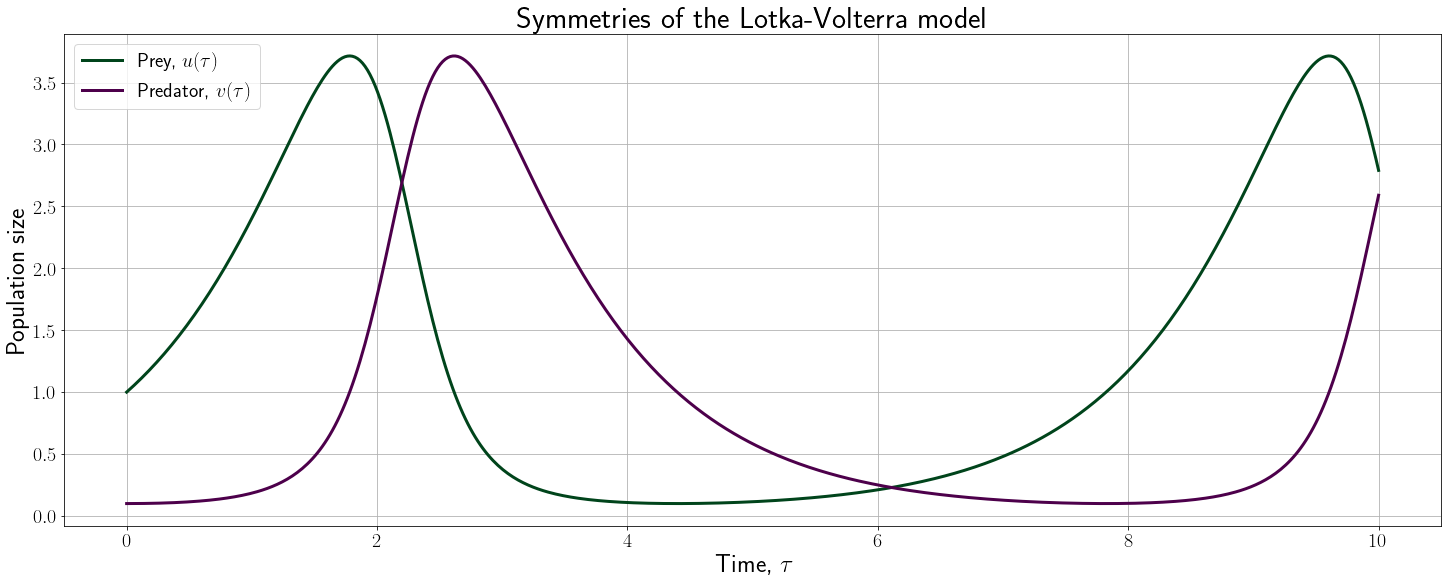

In [1]:
from numpy import * # For numerical calculations,
import matplotlib.pyplot as plt # For plotting,
from scipy import integrate # For solving ODEs.
# Function 1: ODE for the LV model
def dX_dt_LV(X, t=0,a=1):
    """ Return the growth rate of fox and rabbit populations. """
    return array([ X[0]*(1-X[1]) ,
                   a*X[1]*(X[0]-1)])
# Define the time vector and the initial conditions
t = linspace(0, 10, 500)              # time
X0 = array([1, 0.10])                     # initials conditions: 10 rabbits and 5 foxes
# Define our parameter alpha
alpha = 1
# Solve the ODE at hand
X1, infodict = integrate.odeint(dX_dt_LV, X0, t, args = (alpha,),full_output=True)
infodict['message'] # >>> 'Integration successful.'
# Split the solution into its component parts
u, v = X1.T
# Set all parameters to tex
plt.rcParams['text.usetex'] = True
# Plot our lovely solutions
fig_1 = plt.figure(constrained_layout=True, figsize=(20, 8))
plt.plot(t, u, '-', label="Prey, $u(\\tau)$" ,color=(0/256,68/256,27/256),linewidth=3.0)
plt.plot(t, v  , '-', label='Predator, $v(\\tau)$',color=(77/256,0/256,75/256),linewidth=3.0)
plt.grid()
plt.legend(loc='best',prop={"size":20})
plt.xlabel(xlabel='Time, $\\tau$',fontsize=25)
plt.ylabel(ylabel='Population size',fontsize=25)
# Change the size of the ticks
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tick_params(axis='both', which='minor', labelsize=20)
# Title and saving the figure
plt.title('Symmetries of the Lotka-Volterra model',fontsize=30,weight='bold')
plt.savefig('../Figures/LV_solutions.png')


### Plot the u-directional symmetry of the LV-model

/tmp/ipykernel_10948/32741247.py:31: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  xi_u = quad(integrand_u,X[1], 1, args=(X[1],X[2],alpha,0),epsrel = 1e-012)[0]
/tmp/ipykernel_10948/32741247.py:33: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  xi_u = quad(integrand_u, X[1], 1, args=(X[1],X[2],alpha,-1),epsrel = 1e-012)[0]
/tmp/ipykernel_10948/32741247.py:40: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  xi_u = quad(integrand_u, 1, X[1], args=(X[1],X[2],alpha,-1),epsrel = 1e-012)[0]
/tmp/ipykernel_10948/32741247.py:38: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  xi_u = quad(integrand_u, 1, X[1], args=(X[1],X[2],alpha,0),epsrel = 1e-012)[0]


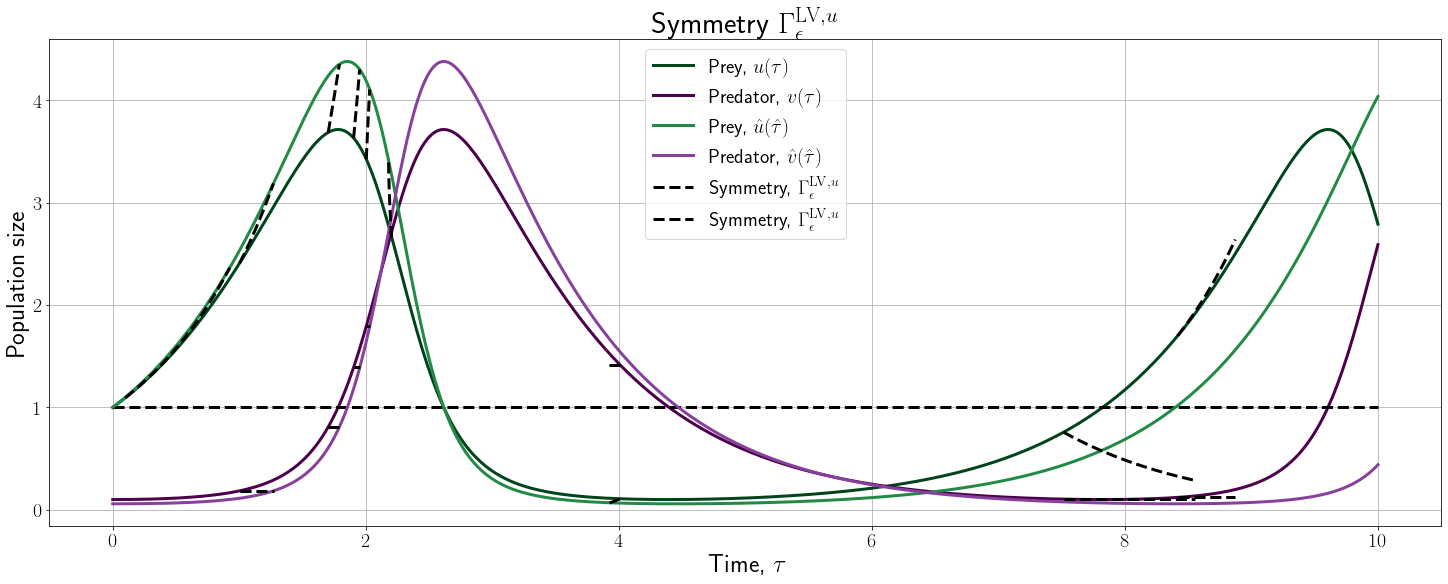

In [2]:
# Import the lambert W function from scipy
from scipy.special import lambertw
# Import quad so we can evaluate our integral as well
from scipy.integrate import quad
#===========================================================================================
# Function 2: For our tricky integrand
def integrand_u(s,u_val,v_val,alpha,branch_number):
    # Calculate the internal energy
    H = alpha*u_val+v_val - log((u_val**alpha)*v_val)
    # Define the invariant
    I_s = -((exp(s)/s)**(alpha))*(1/exp(H))
    # Calculate our main factor in the tangent which depends on the Lambert W function 
    factor = 1+lambertw(I_s,branch_number).real
    # Now we can define the denominator
    denom = factor*((s-1)**2)
    # Now, we can return the integral
    return 1/denom
# Function 3: ODE for the u-directional symmetry of the LV model
def dX_deps_LV_u(X, t=0,*parameters):
    # Extract the parameters
    alpha = parameters[0]
    u_min = parameters[1]
    u_max = parameters[2]
    # Define a tolerance
    tol = 0.1
    # Now, we get a bunch of sub integrals depending on our v
    #xi_u = quad(integrand_u, 1, X[1], args=(X[1],X[2],alpha,0))[0]
    #xi_u += quad(integrand_u, 1, X[1], args=(X[1],X[2],alpha,1))[0]
    if X[1]>1: # u>1
        if X[2]<1: # v<1
            xi_u = quad(integrand_u,X[1], 1, args=(X[1],X[2],alpha,0),epsrel = 1e-012)[0]
        elif X[2]>1: # v>1
            xi_u = quad(integrand_u, X[1], 1, args=(X[1],X[2],alpha,-1),epsrel = 1e-012)[0]
    elif X[1]<1: # u<1
        # We add some segments
        if X[2]<1: # v<1
            #xi_u = quad(integrand_u, X[1], u_max-tol, args=(X[1],X[2],alpha,0),epsrel = 1e-012)[0]
            xi_u = quad(integrand_u, 1, X[1], args=(X[1],X[2],alpha,0),epsrel = 1e-012)[0]
        elif X[2]>1: # v>1
            xi_u = quad(integrand_u, 1, X[1], args=(X[1],X[2],alpha,-1),epsrel = 1e-012)[0]
            #xi_u += quad(integrand_u, 1, X[1], args=(X[1],X[2],alpha,-1),epsrel = 1e-012)[0]        
    # Return the dynamics of the linear system
    return array([xi_u,
                  (1/alpha)*(X[1]/(X[1]-1)),
                 0])
#===========================================================================================
# Set the value of alpha
alpha = 1
# Epsilon value
epsilon = 0.5
# The transformation parameter
epsilon_vec = linspace(0,epsilon,200)              # epsilon
# We know that Lambertz w satisfies the following (see https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.lambertw.html):
# The principal branch (k=0) is real if z>-1/e,
# The branch (k>1) is real if -1/e < z < 0.
# Let's make an experiment.
# Magical index
magical_index = 5
# Calculate the minimal u value
u_min = min(u)
u_max = max(u)
# Take a point
X0 = array([t[magical_index], u[magical_index], v[magical_index]])
# Try to solve the ODE at hand
Gamma_epsilon, infodict = integrate.odeint(dX_deps_LV_u, X0, epsilon_vec, args = (alpha,u_min,u_max),full_output=True)
# Split the solution into its component parts
Gamma_u_t, Gamma_u_u, Gamma_u_v = Gamma_epsilon.T
# Define a new time vector 
t_2 = linspace(Gamma_u_t[-1], 10, 500)
# We need to integrate backwards in time as well to start at 0
t_2_start = linspace(Gamma_u_t[-1], 0, 10)
# Define new initial conditions for the transformed solutions
X02 = array([Gamma_u_t[-1], Gamma_u_u[-1], Gamma_u_v[-1]])  
X0_2 = array([Gamma_u_u[-1], Gamma_u_v[-1]])  
# Solve the ODE at hand with the new initial conditions
# Integrate backwards to get to 0
X2_start, infodict = integrate.odeint(dX_dt_LV, X0_2, t_2_start, args = (1,),full_output=True)
# Find the rest of the solution
X2, infodict = integrate.odeint(dX_dt_LV, X0_2, t_2, args = (1,),full_output=True)
#infodict['message'] # >>> 'Integration successful.'
# Split the solution into its component parts
u_2, v_2 = X2.T
# Split the start bit as well
u_2_start, v_2_start = X2_start.T
# Concatenate to get the full solution curves and the full time
u_2 = concatenate((flip(u_2_start,0), u_2), axis=0)
v_2 = concatenate((flip(v_2_start,0), v_2), axis=0)
t_2 = concatenate((flip(t_2_start,0), t_2), axis=0)
# Plot the symmetry again for some other point on the solution curves
magical_indices = [50, 85, 95, 100, 110, 200, 375, 420]
#magical_indices = [50, 60, 70, 80, 85, 90, 95, 100, 105, 110,375]
#magical_indices = [50, 60, 70, 80, 85, 90, 95]
# The corresponding branches
#branch_indices = [0, 0, 0, 0, 0, 0, -1, -1, -1, -1, -1, -1, -1]
#branch_indices = [0, 0, 0, 0, 0, 0, -1]
# Allocate memory for our lovely symmetry
Gamma_u_t_vec = []
Gamma_u_u_vec = []
Gamma_u_v_vec = []
# Loop over the indices and plot the symmetry transformation
for branch_index,new_magical_index in enumerate(magical_indices):
    # Take a point
    X0 = array([t[new_magical_index], u[new_magical_index], v[new_magical_index]])  
    # Try to solve the ODE at hand
    Gamma_epsilon_temp, infodict = integrate.odeint(dX_deps_LV_u, X0, epsilon_vec, args = (alpha,u_min,u_max),full_output=True)    
    # Split the solution into its component parts
    Gamma_u_t_temp, Gamma_u_u_temp, Gamma_u_v_temp = Gamma_epsilon_temp.T    
    # Append our solutions
    Gamma_u_t_vec.append(Gamma_u_t_temp)    
    Gamma_u_u_vec.append(Gamma_u_u_temp)    
    Gamma_u_v_vec.append(Gamma_u_v_temp)    
#=====================================================================================================
# Set all parameters to tex
plt.rcParams['text.usetex'] = True
# Se if we can plot our symmetry?
fig_2 = plt.figure(constrained_layout=True, figsize=(20, 8))
# Prey
plt.plot(t, u, '-', label="Prey, $u(\\tau)$" ,color=(0/256,68/256,27/256),linewidth=3.0)
# Predator
plt.plot(t, v  , '-', label='Predator, $v(\\tau)$',color=(77/256,0/256,75/256),linewidth=3.0)
# Dashed line at u=1
plt.plot(t, array([u_temp/u_temp for u_temp in u]), '--', color=(0/256,0/256,0/256),linewidth=3.0)
# Predator transformed
plt.plot(t_2, u_2, '-', label="Prey, $\\hat{u}(\\hat{\\tau})$" ,color=(35/256,139/256,69/256),linewidth=3.0)
# Prey transformed
plt.plot(t_2, v_2, '-', label="Predator, $\\hat{v}(\\hat{\\tau})$" ,color=(136/256,65/256,157/256),linewidth=3.0)
# The symmetry with legend
plt.plot(Gamma_u_t,Gamma_u_u, '--', label="Symmetry, $\\Gamma_{\\epsilon}^{\\mathrm{LV},u}$" ,color=(0/256,0/256,0/256),linewidth=3.0)
# The symmetry without legend
for index in range(len(Gamma_u_t_vec)):
    if index == 0:
        plt.plot(Gamma_u_t_vec[index],Gamma_u_u_vec[index], '--', label="Symmetry, $\\Gamma_{\\epsilon}^{\\mathrm{LV},u}$" ,color=(0/256,0/256,0/256),linewidth=3.0)
        plt.plot(Gamma_u_t_vec[index],Gamma_u_v_vec[index], '--',color=(0/256,0/256,0/256),linewidth=3.0)
    else:
        plt.plot(Gamma_u_t_vec[index],Gamma_u_u_vec[index], '--',color=(0/256,0/256,0/256),linewidth=3.0)
        plt.plot(Gamma_u_t_vec[index],Gamma_u_v_vec[index], '--',color=(0/256,0/256,0/256),linewidth=3.0)
plt.grid()
plt.legend(loc='best',prop={"size":20})
plt.xlabel(xlabel='Time, $\\tau$',fontsize=25)
plt.ylabel(ylabel='Population size',fontsize=25)
# Change the size of the ticks
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tick_params(axis='both', which='minor', labelsize=20)
# Title and saving the figure
plt.title('Symmetry $\\Gamma_{\epsilon}^{\\mathrm{LV},u}$',fontsize=30,weight='bold');
plt.show()

### Plot the v-directional symmetry of the LV-model

/tmp/ipykernel_10948/31994567.py:21: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  xi_v = quad(integrand_v, v_min, X[2], args=(X[1],X[2],alpha,branch_number))[0]


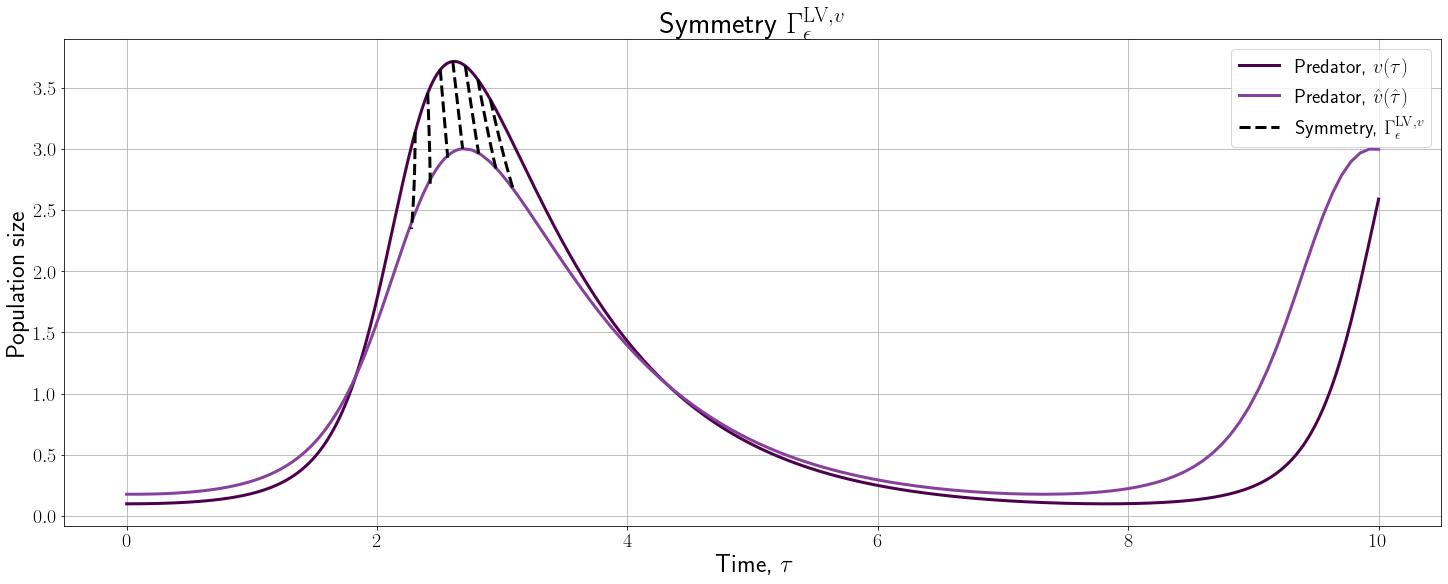

In [4]:
#===========================================================================================
# Function 4: For our tricky integrand
def integrand_v(s,u_val,v_val,alpha,branch_number):
    # Calculate the internal energy
    H = alpha*u_val+v_val - log((u_val**alpha)*v_val)
    # Define the invariant
    I_s = -(1/alpha)*(((exp(s-H))/(alpha*s))**(1/alpha))
    # Calculate our main factor in the tangent which depends on the Lambert W function 
    factor = 1+lambertw(I_s,branch_number).real
    # Now we can define the denominator
    denom = factor*((1-s)**2)
    # Now, we can return the integral
    return -1/denom
# Function 5: ODE for the v-directional symmetry of the LV model
def dX_deps_LV_v(X, t=0,*parameters):
    # Extract the parameters
    alpha = parameters[0]
    branch_number = parameters[1]
    v_min = parameters[2]
    # Solve the integral for the time tangent
    xi_v = quad(integrand_v, v_min, X[2], args=(X[1],X[2],alpha,branch_number))[0]
    # Return the dynamics of the linear system
    return array([xi_v,
                  0,
                 ((X[2])/(1-X[2]))])
#===========================================================================================
# Epsilon value
epsilon = 0.5
# The transformation parameter
epsilon_vec = linspace(0,epsilon,200)              # epsilon
# Magical index
magical_index = 130
# Take a point
X0 = array([t[magical_index], u[magical_index], v[magical_index]])
# Define the minimal u value
v_min = 1
# Try to solve the ODE at hand
Gamma_epsilon, infodict = integrate.odeint(dX_deps_LV_v, X0, epsilon_vec, args = (alpha,0,v_min),full_output=True)
# Split the solution into its component parts
Gamma_v_t, Gamma_v_u, Gamma_v_v = Gamma_epsilon.T
# Define a new time vector 
t_2 = linspace(Gamma_v_t[-1], 10, 100)
# We need to integrate backwards in time as well to start at 0
t_2_start = linspace(Gamma_v_t[-1], 0, 400)
# Define new initial conditions for the transformed solutions
X02 = array([Gamma_v_t[-1], Gamma_v_u[-1], Gamma_v_v[-1]])  
X0_2 = array([Gamma_v_u[-1], Gamma_v_v[-1]])  
# Solve the ODE at hand with the new initial conditions
# Integrate backwards to get to 0
X2_start, infodict = integrate.odeint(dX_dt_LV, X0_2, t_2_start, args = (1,),full_output=True)
# Find the rest of the solution
X2, infodict = integrate.odeint(dX_dt_LV, X0_2, t_2, args = (1,),full_output=True)
#infodict['message'] # >>> 'Integration successful.'
# Split the solution into its component parts
u_2, v_2 = X2.T
# Split the start bit as well
u_2_start, v_2_start = X2_start.T
# Concatenate to get the full solution curves and the full time
u_2 = concatenate((flip(u_2_start,0), u_2), axis=0)
v_2 = concatenate((flip(v_2_start,0), v_2), axis=0)
t_2 = concatenate((flip(t_2_start,0), t_2), axis=0)
# Plot the symmetry again for some other point on the solution curves
magical_indices = [magical_index-15,magical_index-10,magical_index-5,magical_index,magical_index+5,magical_index+10,magical_index+15]
#magical_indices = [magical_index-15]
# The corresponding branches
branch_indices = [-1,-1,-1,0,0,0,0,0]
#branch_indices = [-1]
# Allocate memory for our lovely symmetry
Gamma_v_t_vec = []
Gamma_v_v_vec = []
# Loop over the indices and plot the symmetry transformation
for branch_index,new_magical_index in enumerate(magical_indices):
    # Take a point
    X0 = array([t[new_magical_index], u[new_magical_index], v[new_magical_index]])  
    # Try to solve the ODE at hand
    Gamma_epsilon_temp, infodict = integrate.odeint(dX_deps_LV_v, X0, epsilon_vec, args = (alpha,branch_indices[branch_index],v_min),full_output=True)    
    # Split the solution into its component parts
    Gamma_v_t_temp, Gamma_v_u_temp, Gamma_v_v_temp = Gamma_epsilon_temp.T    
    # Append our solutions
    Gamma_v_t_vec.append(Gamma_v_t_temp)    
    Gamma_v_v_vec.append(Gamma_v_v_temp)  
#=====================================================================================================
# Set all parameters to tex
plt.rcParams['text.usetex'] = True
# Se if we can plot our symmetry?
fig_3 = plt.figure(constrained_layout=True, figsize=(20, 8))
# The original solution
plt.plot(t, v, '-', label="Predator, $v(\\tau)$" ,color=(77/256,0/256,75/256),linewidth=3.0)
# The transformed solution
plt.plot(t_2, v_2, '-', label="Predator, $\\hat{v}(\\hat{\\tau})$" ,color=(136/256,65/256,157/256),linewidth=3.0)
# Plot the symmetry
for index in range(len(Gamma_v_t_vec)):
    if index == 0:
        plt.plot(Gamma_v_t_vec[index],Gamma_v_v_vec[index], '--', label="Symmetry, $\\Gamma_{\\epsilon}^{\\mathrm{LV},v}$" ,color=(0/256,0/256,0/256),linewidth=3.0)
    else:
        plt.plot(Gamma_v_t_vec[index],Gamma_v_v_vec[index], '--',color=(0/256,0/256,0/256),linewidth=3.0)
plt.grid()
plt.legend(loc='best',prop={"size":20})
plt.xlabel(xlabel='Time, $\\tau$',fontsize=25)
plt.ylabel(ylabel='Population size',fontsize=25)
# Change the size of the ticks
plt.tick_params(axis='both', which='major', labelsize=20)
plt.tick_params(axis='both', which='minor', labelsize=20)
# Title and saving the figure
plt.title('Symmetry $\\Gamma_{\epsilon}^{\\mathrm{LV},v}$',fontsize=30,weight='bold');

## See where the symmetry is defined and not
Now, we will see where our two symmetries are well-defined. We will do this by trying to solving the following equations for $X_u$ 
$$s_u=\alpha (u-\ln(u)),\quad\tilde{r}_u=v$$
and for $X_v$ 
$$s_v=\ln\left(v\right)-v,\quad\tilde{r}_v=u$$
numerically. 

/tmp/ipykernel_10948/366391588.py:5: RuntimeWarning: divide by zero encountered in log
  func = lambda u_hat :  u - log(u) + epsilon - (u_hat - log(u_hat))
/tmp/ipykernel_10948/366391588.py:5: RuntimeWarning: invalid value encountered in subtract
  func = lambda u_hat :  u - log(u) + epsilon - (u_hat - log(u_hat))
/home/johannes/anaconda3/lib/python3.8/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/tmp/ipykernel_10948/366391588.py:5: RuntimeWarning: invalid value encountered in log
  func = lambda u_hat :  u - log(u) + epsilon - (u_hat - log(u_hat))
/tmp/ipykernel_10948/366391588.py:13: RuntimeWarning: divide by zero encountered in log
  func = lambda v_hat :  log(v**(1/alpha)) - (v/alpha) + epsilon - (log(v_hat**(1/alpha)) - (v_hat/alpha))
/tmp/ipykernel_10948/366391588.py:13: RuntimeWarning: invalid value encountered in subtrac

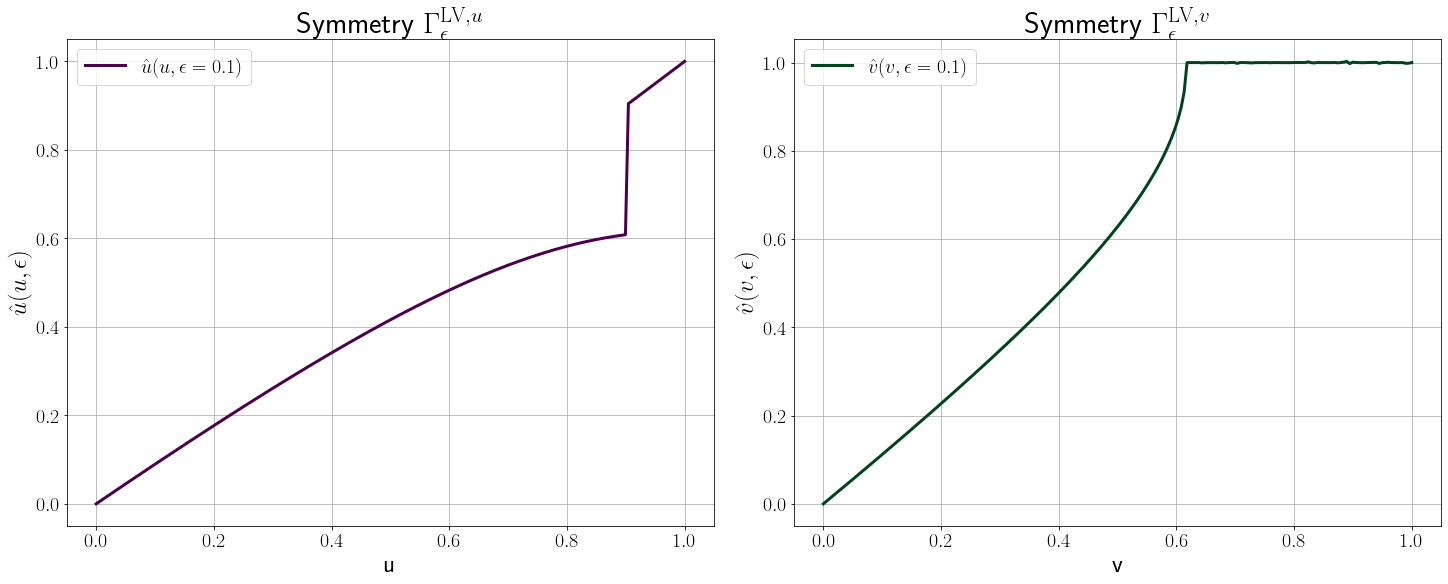

In [7]:
from scipy.optimize import fsolve
#===========================================================================================
# Function 6: u_transf
def u_transf(u, epsilon):
    func = lambda u_hat :  u - log(u) + epsilon - (u_hat - log(u_hat))
    if abs(u-1)<0.000000000001:
        u_hat_solution = u
    else:
        u_hat_solution = fsolve(func, u)[0]
    return u_hat_solution
# Function 7: v_transf
def v_transf(v, epsilon, alpha):
    func = lambda v_hat :  log(v**(1/alpha)) - (v/alpha) + epsilon - (log(v_hat**(1/alpha)) - (v_hat/alpha))
    if abs(v-1)<0.00000000001:
        v_hat_solution = v
    else:
        v_hat_solution = fsolve(func, v)[0]
    return v_hat_solution
#===========================================================================================
# Pick an epsilon value 
epsilon = 0.1
# Find a vector of u-values
u_vec = linspace(0,1,200)
# Find a vector of the transformation
u_trans = array([u_transf(u_temp,epsilon) for u_temp in u_vec])
# Find a vector of u-values
v_vec = linspace(0,1,200)
# Find a vector of the transformation
v_trans = array([v_transf(v_temp,epsilon,alpha) for v_temp in v_vec])

# Set all parameters to tex
plt.rcParams['text.usetex'] = True
# Se if we can plot our symmetry?
#fig_4,ax_4 = plt.figure(1,2,constrained_layout=True, figsize=(20, 8))
fig_4, axs_4 = plt.subplots(1, 2, constrained_layout=True, figsize=(20, 8))
# The original solution
axs_4[0].plot(u_vec, u_trans, '-', label="$\\hat{u}(u,\\epsilon=0.1)$" ,color=(77/256,0/256,75/256),linewidth=3.0)
# Properties of the plot
axs_4[0].grid()
axs_4[0].legend(loc='best',prop={"size":20})
axs_4[0].set_xlabel('u',fontsize=25)
axs_4[0].set_ylabel('$\hat{u}(u,\\epsilon)$',fontsize=25)
# Change the size of the ticks
axs_4[0].tick_params(axis='both', which='major', labelsize=20)
axs_4[0].tick_params(axis='both', which='minor', labelsize=20)
# Title and saving the figure
axs_4[0].set_title('Symmetry $\\Gamma_{\epsilon}^{\\mathrm{LV},u}$',fontsize=30,weight='bold');
# The original solution
axs_4[1].plot(v_vec, v_trans, '-', label="$\\hat{v}(v,\\epsilon=0.1)$" ,color=(0/256,68/256,27/256),linewidth=3.0)
# Properties of the plot
axs_4[1].grid()
axs_4[1].legend(loc='best',prop={"size":20})
axs_4[1].set_xlabel('v',fontsize=25)
axs_4[1].set_ylabel('$\hat{v}(v,\\epsilon)$',fontsize=25)
# Change the size of the ticks
axs_4[1].tick_params(axis='both', which='major', labelsize=20)
axs_4[1].tick_params(axis='both', which='minor', labelsize=20)
# Title and saving the figure
axs_4[1].set_title('Symmetry $\\Gamma_{\epsilon}^{\\mathrm{LV},v}$',fontsize=30,weight='bold');

## Plot LV-phase portrait in terms of the Lambert W function
Next, we want to generate the phase portrait of the LV-model using the Lambert W function. In essence, we want to plot two principal branches $j=0,-1$ of the two functions 
$$W_j\left(-\left(\dfrac{\exp(u)}{u}\right)^{\alpha}\dfrac{1}{\exp(H)}\right)$$
in the case of $\xi_u$ and 
$$W_j\left(-\dfrac{1}{\alpha}\left(\dfrac{\exp\left(v-H\right)}{\alpha v}\right)^{1/\alpha}\right).$$
Here, $W_j$ is the Lambert W function and the internal energy $H$ is given by
$$H=\alpha u_0+v_0-\ln\left(u_0^\alpha v_0\right).$$

Now, it turns out that the branches of the Lambert W function meet at the point $(-1/e,-1)$. So, let's just plot these two branches and see what happens! 


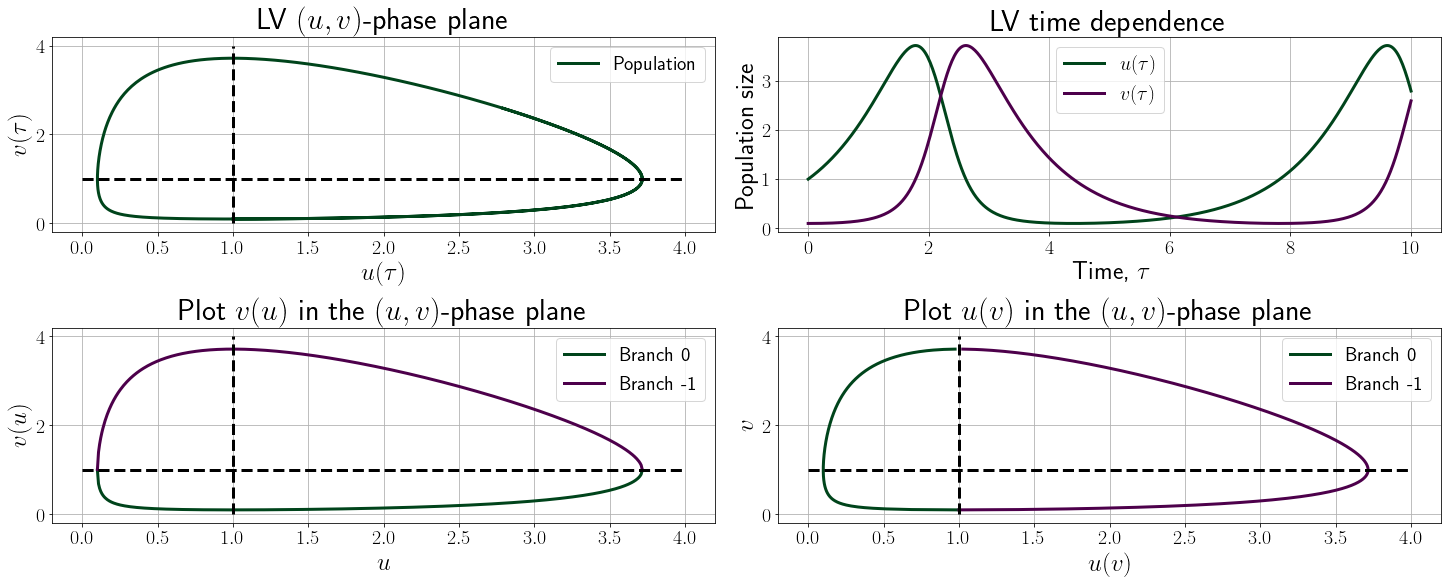

In [8]:
# Extract two values at our original solution curve
u_val = u[0]
v_val = v[0]
# Define the internal energy 
H = alpha*u_val+v_val - log((u_val**alpha)*v_val)
# Define a functions we want to find the minimum of
I_u = lambda u_temp : (exp(u_temp)/u_temp)**alpha*(1/exp(H))
# Define a functions we want to find the minimum of
I_v = lambda v_temp : (1/alpha)*(exp(v_temp-H)/(alpha*v_temp))**(1/alpha)
# u_threshold
u_threshold = array([1 for u_particular_val in u])
v_threshold = linspace(0,4,len(u))
# Try to plot the branches as well,hey? 
u_vec = linspace(min(u),max(u),500)
# Define our Lambert function
v_u_Lw_1 = array([-lambertw(-I_u(u_temp),0).real for u_temp in u_vec])
v_u_Lw_2 = array([-lambertw(-I_u(u_temp),-1).real for u_temp in u_vec])
# Try to plot the branches as well,hey? 
v_vec = linspace(min(v),max(v),500)
# Define our Lambert function
u_v_Lw_1 = array([-lambertw(-I_v(v_temp),0).real for v_temp in v_vec])
u_v_Lw_2 = array([-lambertw(-I_v(v_temp),-1).real for v_temp in v_vec])
# Set all parameters to tex
plt.rcParams['text.usetex'] = True
# The figure here
#fig_5 = plt.figure(constrained_layout=True, figsize=(20, 8))
fig_5, axs_5 = plt.subplots(2, 2, constrained_layout=True, figsize=(20, 8))
# The function for u
axs_5[0][0].plot(u, v, '-', label="Population" ,color=(0/256,68/256,27/256),linewidth=3.0)
axs_5[0][0].plot(u_threshold,v_threshold, '--',color=(0/256,0/256,0/256),linewidth=3.0)
axs_5[0][0].plot(v_threshold,u_threshold, '--' ,color=(0/256,0/256,0/256),linewidth=3.0)
axs_5[0][0].grid()
axs_5[0][0].legend(loc='best',prop={"size":20})
axs_5[0][0].set_xlabel('$u(\\tau)$',fontsize=25)
axs_5[0][0].set_ylabel('$v(\\tau)$',fontsize=25)
# Change the size of the ticks
axs_5[0][0].tick_params(axis='both', which='major', labelsize=20)
axs_5[0][0].tick_params(axis='both', which='minor', labelsize=20)
# Title and saving the figure
axs_5[0][0].set_title('LV $(u,v)$-phase plane',fontsize=30,weight='bold');
# The function for u
axs_5[0][1].plot(t,u, '-', label="$u(\\tau)$" ,color=(0/256,68/256,27/256),linewidth=3.0)
axs_5[0][1].plot(t,v, '-', label="$v(\\tau)$" ,color=(77/256,0/256,75/256),linewidth=3.0)
axs_5[0][1].grid()
axs_5[0][1].legend(loc='best',prop={"size":20})
axs_5[0][1].set_xlabel('Time, $\\tau$',fontsize=25)
axs_5[0][1].set_ylabel('Population size',fontsize=25)
# Change the size of the ticks
axs_5[0][1].tick_params(axis='both', which='major', labelsize=20)
axs_5[0][1].tick_params(axis='both', which='minor', labelsize=20)
# Title and saving the figure
axs_5[0][1].set_title('LV time dependence',fontsize=30,weight='bold');
# The function v(u) in the (u,v)-phase plane 
axs_5[1][0].plot(u_vec, v_u_Lw_1, '-', label="Branch 0" ,color=(0/256,68/256,27/256),linewidth=3.0)
axs_5[1][0].plot(u_vec, v_u_Lw_2, '-', label="Branch -1" ,color=(77/256,0/256,75/256),linewidth=3.0)
axs_5[1][0].plot(u_threshold,v_threshold, '--',color=(0/256,0/256,0/256),linewidth=3.0)
axs_5[1][0].plot(v_threshold,u_threshold, '--' ,color=(0/256,0/256,0/256),linewidth=3.0)
axs_5[1][0].grid()
axs_5[1][0].legend(loc='best',prop={"size":20})
axs_5[1][0].set_xlabel('$u$',fontsize=25)
axs_5[1][0].set_ylabel('$v(u)$',fontsize=25)
# Change the size of the ticks
axs_5[1][0].tick_params(axis='both', which='major', labelsize=20)
axs_5[1][0].tick_params(axis='both', which='minor', labelsize=20)
# Title and saving the figure
axs_5[1][0].set_title('Plot $v(u)$ in the $(u,v)$-phase plane',fontsize=30,weight='bold');
# The function u(v) in the (u,v)-phase plane
axs_5[1][1].plot(u_v_Lw_1, v_vec, '-', label="Branch 0" ,color=(0/256,68/256,27/256),linewidth=3.0)
axs_5[1][1].plot(u_v_Lw_2, v_vec, '-', label="Branch -1" ,color=(77/256,0/256,75/256),linewidth=3.0)
axs_5[1][1].plot(u_threshold,v_threshold, '--',color=(0/256,0/256,0/256),linewidth=3.0)
axs_5[1][1].plot(v_threshold,u_threshold, '--' ,color=(0/256,0/256,0/256),linewidth=3.0)
axs_5[1][1].grid()
axs_5[1][1].legend(loc='best',prop={"size":20})
axs_5[1][1].set_xlabel('$u(v)$',fontsize=25)
axs_5[1][1].set_ylabel('$v$',fontsize=25)
# Change the size of the ticks
axs_5[1][1].tick_params(axis='both', which='major', labelsize=20)
axs_5[1][1].tick_params(axis='both', which='minor', labelsize=20)
# Title and saving the figure
axs_5[1][1].set_title('Plot $u(v)$ in the $(u,v)$-phase plane',fontsize=30,weight='bold');

That is pretty fantastic! Now, we now how these branches work. Next, we'll see where the integrands defining the time infinitesimals are defined. 
# Analysis of the regularity of the time infinitesimals
Consider the time infinitesimal $\xi_u$ given by
\begin{equation}
  \begin{split}
    \xi_u(u)&=-\int_{u_{\min}}^{u}\dfrac{1}{(1+W_j(I(s)))(s-1)^2}\mathrm{d}s,\\
    I(s)&=-\left(\dfrac{\exp(s)}{s}\right)^{\alpha}\dfrac{1}{\exp(H)},
    \end{split}
  \label{eq:xi_u_final}
\end{equation}
and the time infinitesimal $\xi_v$ given by
\begin{equation}
  \begin{split}
    \xi_v(v)&=-\int_{v_{min}}^{v}\dfrac{1}{(W_j\left(I(s)\right)+1)(1-s)^2}\mathrm{d}s,\\
  I(s)&=-\dfrac{1}{\alpha}\left(\dfrac{\exp\left(s-H\right)}{\alpha s}\right)^{1/\alpha}.
\end{split}
  \label{eq:xi_v_final}
\end{equation}
Now, we will try to plot these integrands as a function of u in order to see where they are defined.

/tmp/ipykernel_10948/2807214793.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  integrand_v_Lw_1 = array([-((1)/((1+lambertw(-I_v(v_temp),0).real)*(1-v_temp)**2)) for v_temp in v_vec])


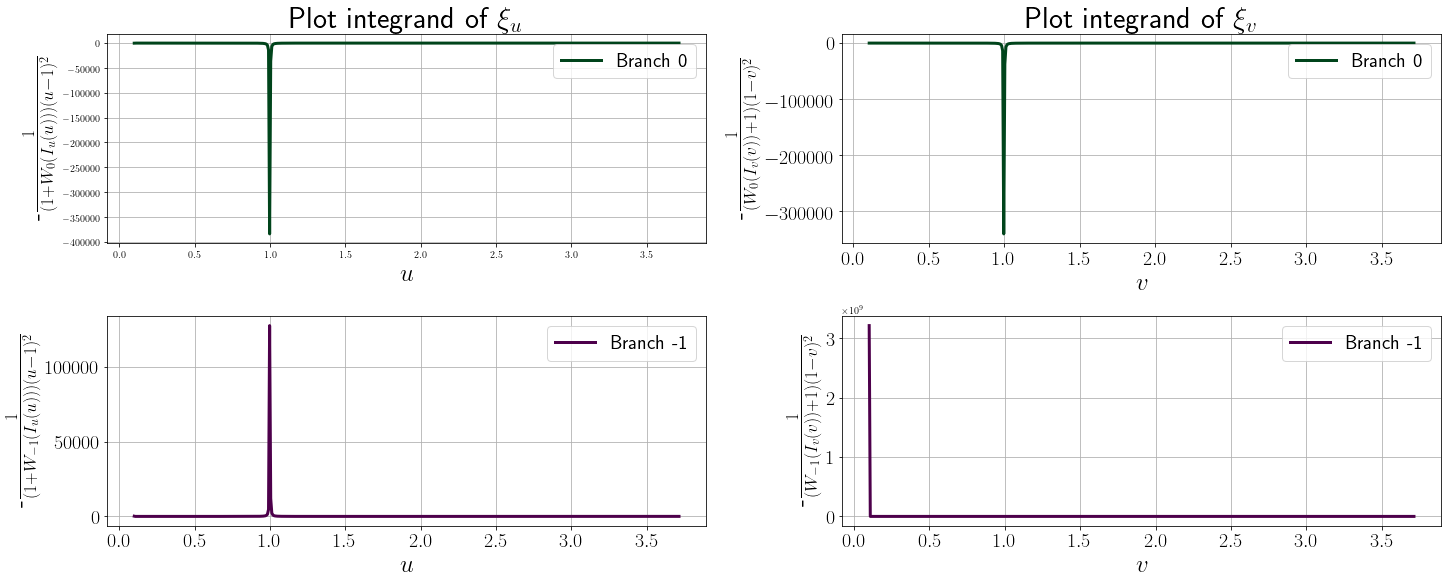

In [29]:
# Define our vector u
u_vec = linspace(min(u),max(u),500)
# Branch 0: Integrand corresponding to xi_u
integrand_u_Lw_1 = array([-((1)/((1+lambertw(-I_u(u_temp),0).real)*(u_temp-1)**2)) for u_temp in u_vec])
# Branch -1: Integrand corresponding to xi_u
integrand_u_Lw_2 = array([-((1)/((1+lambertw(-I_u(u_temp),-1).real)*(u_temp-1)**2)) for u_temp in u_vec])
# Define a vector with v-values as well
v_vec = linspace(min(v),max(v),500)
# Branch 0: Integrand corresponding to xi_v
integrand_v_Lw_1 = array([-((1)/((1+lambertw(-I_v(v_temp),0).real)*(1-v_temp)**2)) for v_temp in v_vec])
# Branch -1: Integrand corresponding to xi_v
integrand_v_Lw_2 = array([-((1)/((1+lambertw(-I_v(v_temp),-1).real)*(1-v_temp)**2)) for v_temp in v_vec])
# Set all parameters to tex
plt.rcParams['text.usetex'] = True
# The figure here
fig_6, axs_6 = plt.subplots(2, 2, constrained_layout=True, figsize=(20, 8))
# Plot the solutions
# The the integrand of xi_u vs u
axs_6[0][0].plot(u_vec, integrand_u_Lw_1, '-', label="Branch 0" ,color=(0/256,68/256,27/256),linewidth=3.0)
axs_6[0][0].grid()
axs_6[0][0].legend(loc='best',prop={"size":20})
axs_6[0][0].set_xlabel('$u$',fontsize=25)
axs_6[0][0].set_ylabel('-$\\frac{1}{(1+W_0\\left(I_u(u)\\right))(u-1)^2}$',fontsize=25)
# Title and saving the figure
axs_6[0][0].set_title('Plot integrand of $\\xi_u$',fontsize=30,weight='bold');
# Change the size of the ticks
axs_6[1][0].tick_params(axis='both', which='major', labelsize=20)
axs_6[1][0].tick_params(axis='both', which='minor', labelsize=20)
axs_6[1][0].plot(u_vec, integrand_u_Lw_2, '-', label="Branch -1" ,color=(77/256,0/256,75/256),linewidth=3.0)
axs_6[1][0].grid()
axs_6[1][0].legend(loc='best',prop={"size":20})
axs_6[1][0].set_xlabel('$u$',fontsize=25)
axs_6[1][0].set_ylabel('-$\\frac{1}{(1+W_{-1}\\left(I_u(u)\\right))(u-1)^2}$',fontsize=25)
# Change the size of the ticks
axs_6[1][0].tick_params(axis='both', which='major', labelsize=20)
axs_6[1][0].tick_params(axis='both', which='minor', labelsize=20)
# The the integrand of xi_v vs v
axs_6[0][1].plot(v_vec, integrand_v_Lw_1, '-', label="Branch 0" ,color=(0/256,68/256,27/256),linewidth=3.0)
axs_6[0][1].grid()
axs_6[0][1].legend(loc='best',prop={"size":20})
axs_6[0][1].set_xlabel('$v$',fontsize=25)
axs_6[0][1].set_ylabel('-$\\frac{1}{(W_{0}\\left(I_v(v)\\right)+1)(1-v)^2}$',fontsize=25)
# Change the size of the ticks
axs_6[0][1].tick_params(axis='both', which='major', labelsize=20)
axs_6[0][1].tick_params(axis='both', which='minor', labelsize=20)
# Title and saving the figure
axs_6[0][1].set_title('Plot integrand of $\\xi_v$',fontsize=30,weight='bold');
# Branch -1
axs_6[1][1].plot(v_vec, integrand_v_Lw_2, '-', label="Branch -1" ,color=(77/256,0/256,75/256),linewidth=3.0)
axs_6[1][1].grid()
axs_6[1][1].legend(loc='best',prop={"size":20})
axs_6[1][1].set_xlabel('$v$',fontsize=25)
axs_6[1][1].set_ylabel('-$\\frac{1}{(W_{-1}\\left(I_v(v)\\right)+1)(1-v)^2}$',fontsize=25)
# Change the size of the ticks
axs_6[1][1].tick_params(axis='both', which='major', labelsize=20)
axs_6[1][1].tick_params(axis='both', which='minor', labelsize=20)

That is brilliant, because that means that we should be able to remove these discontinuities when we integrate. Let's see if we can plot these modified integrands.

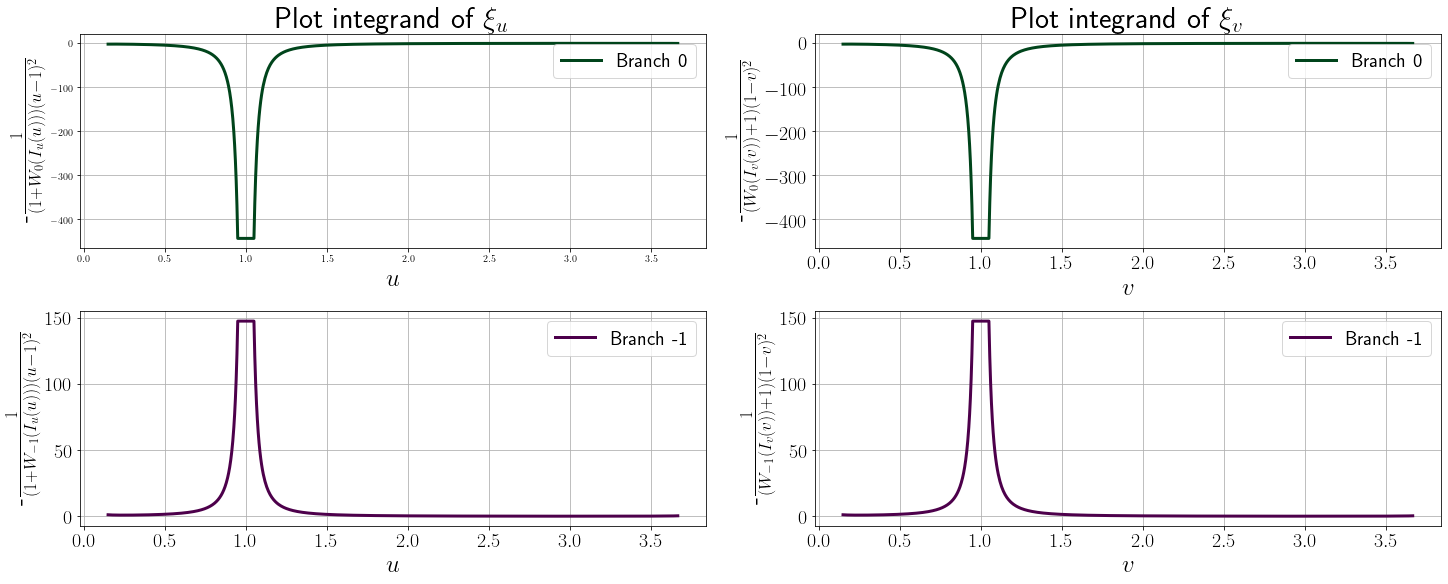

In [40]:
# Define a delta value
delta_u = 0.05
# Define our vector u
u_vec_1 = linspace(min(u)+delta_u,1-delta_u,500)
# Define our second vector u
u_vec_2 = linspace(1+delta_u,max(u)-delta_u,500)
# Branch 0: Integrand corresponding to xi_u
integrand_u_Lw_1_1 = array([-((1)/((1+lambertw(-I_u(u_temp),0).real)*(u_temp-1)**2)) for u_temp in u_vec_1])
integrand_u_Lw_1_2 = array([-((1)/((1+lambertw(-I_u(u_temp),0).real)*(u_temp-1)**2)) for u_temp in u_vec_2])
# Branch -1: Integrand corresponding to xi_u
integrand_u_Lw_2_1 = array([-((1)/((1+lambertw(-I_u(u_temp),-1).real)*(u_temp-1)**2)) for u_temp in u_vec_1])
integrand_u_Lw_2_2 = array([-((1)/((1+lambertw(-I_u(u_temp),-1).real)*(u_temp-1)**2)) for u_temp in u_vec_2])
# Concatenate everything
u_vec_mashed = concatenate((u_vec_1,u_vec_2), axis=0)
integrand_u_Lw_1_mashed = concatenate((integrand_u_Lw_1_1, integrand_u_Lw_1_2), axis=0)
integrand_u_Lw_2_mashed = concatenate((integrand_u_Lw_2_1, integrand_u_Lw_2_2), axis=0)
# Define a delta value
delta_v = 0.05
# Define our vector u
v_vec_1 = linspace(min(v)+delta_v,1-delta_v,500)
# Define our second vector u
v_vec_2 = linspace(1+delta_v,max(v)-delta_v,500)
# Branch 0: Integrand corresponding to xi_v
integrand_v_Lw_1_1 = array([-((1)/((1+lambertw(-I_v(v_temp),0).real)*(1-v_temp)**2)) for v_temp in v_vec_1])
integrand_v_Lw_1_2 = array([-((1)/((1+lambertw(-I_v(v_temp),0).real)*(1-v_temp)**2)) for v_temp in v_vec_2])
# Branch -1: Integrand corresponding to xi_v
integrand_v_Lw_2_1 = array([-((1)/((1+lambertw(-I_v(v_temp),-1).real)*(1-v_temp)**2)) for v_temp in v_vec_1])
integrand_v_Lw_2_2 = array([-((1)/((1+lambertw(-I_v(v_temp),-1).real)*(1-v_temp)**2)) for v_temp in v_vec_2])
# Concatenate everything
v_vec_mashed = concatenate((v_vec_1,v_vec_2), axis=0)
integrand_v_Lw_1_mashed = concatenate((integrand_v_Lw_1_1, integrand_v_Lw_1_2), axis=0)
integrand_v_Lw_2_mashed = concatenate((integrand_v_Lw_2_1, integrand_v_Lw_2_2), axis=0)
# Set all parameters to tex
plt.rcParams['text.usetex'] = True
# The figure here
fig_7, axs_7 = plt.subplots(2, 2, constrained_layout=True, figsize=(20, 8))
# Plot the solutions
# The the integrand of xi_u vs u
axs_7[0][0].plot(u_vec_mashed, integrand_u_Lw_1_mashed, '-', label="Branch 0" ,color=(0/256,68/256,27/256),linewidth=3.0)
axs_7[0][0].grid()
axs_7[0][0].legend(loc='best',prop={"size":20})
axs_7[0][0].set_xlabel('$u$',fontsize=25)
axs_7[0][0].set_ylabel('-$\\frac{1}{(1+W_0\\left(I_u(u)\\right))(u-1)^2}$',fontsize=25)
# Title and saving the figure
axs_7[0][0].set_title('Plot integrand of $\\xi_u$',fontsize=30,weight='bold');
# Change the size of the ticks
axs_7[1][0].tick_params(axis='both', which='major', labelsize=20)
axs_7[1][0].tick_params(axis='both', which='minor', labelsize=20)
axs_7[1][0].plot(u_vec_mashed, integrand_u_Lw_2_mashed, '-', label="Branch -1" ,color=(77/256,0/256,75/256),linewidth=3.0)
axs_7[1][0].grid()
axs_7[1][0].legend(loc='best',prop={"size":20})
axs_7[1][0].set_xlabel('$u$',fontsize=25)
axs_7[1][0].set_ylabel('-$\\frac{1}{(1+W_{-1}\\left(I_u(u)\\right))(u-1)^2}$',fontsize=25)
# The the integrand of xi_v vs v
axs_7[0][1].plot(v_vec_mashed, integrand_v_Lw_1_mashed, '-', label="Branch 0" ,color=(0/256,68/256,27/256),linewidth=3.0)
axs_7[0][1].grid()
axs_7[0][1].legend(loc='best',prop={"size":20})
axs_7[0][1].set_xlabel('$v$',fontsize=25)
axs_7[0][1].set_ylabel('-$\\frac{1}{(W_{0}\\left(I_v(v)\\right)+1)(1-v)^2}$',fontsize=25)
# Change the size of the ticks
axs_7[0][1].tick_params(axis='both', which='major', labelsize=20)
axs_7[0][1].tick_params(axis='both', which='minor', labelsize=20)
# Title and saving the figure
axs_7[0][1].set_title('Plot integrand of $\\xi_v$',fontsize=30,weight='bold');
# Branch -1
axs_7[1][1].plot(v_vec_mashed, integrand_v_Lw_2_mashed, '-', label="Branch -1" ,color=(77/256,0/256,75/256),linewidth=3.0)
axs_7[1][1].grid()
axs_7[1][1].legend(loc='best',prop={"size":20})
axs_7[1][1].set_xlabel('$v$',fontsize=25)
axs_7[1][1].set_ylabel('-$\\frac{1}{(W_{-1}\\left(I_v(v)\\right)+1)(1-v)^2}$',fontsize=25)
# Change the size of the ticks
axs_7[1][1].tick_params(axis='both', which='major', labelsize=20)
axs_7[1][1].tick_params(axis='both', which='minor', labelsize=20)